# Task 03 - Clustering

**Clustering (การจับกลุ่มเมล็ดพันธุ์ข้าว)**


โดยจับกลุ่มโดยอิงจากคุณลักษณะทั้งหมด 106 คุณลักษณะจากภาพ ได้แก่ คุณลักษณะทางสัณฐานวิทยา 12 คุณลักษณะ รูปร่าง 4 คุณลักษณะ และ สี 90 คุณลักษณะ ซึ่งชุดข้อมูลสามารถดาวน์โหลดได้จาก https://github.com/dsmlr/ML-2021-Dataset/blob/master/Rice%20Clustering/rice_data.csv



In [92]:
NAME = "ธัญลักษณ์ คำยวน"
STUDENT_ID = "62070247"



---



## 1. Libraries

### 1.1 Import Libraries

In [93]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)
# numpy.random.seed() ทำให้ตัวเลขสุ่มคาดเดาได้และใช้สำหรับทำซ้ำได้
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

### 1.2 Drive Mount

In [94]:
# Drive mount
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 2. Get Data

### 2.1 Load Data Function

In [95]:
# Define a fuction to load dataset
def load_data():
  df = pd.read_csv('/content/drive/MyDrive/ML File/rice_data.csv')
  return df

### 2.2 Load Data

In [96]:
# Call function load_data()
df = load_data()
# Set to display all columns in dataset
pd.set_option('display.max_columns', None)
# Set to display all rows in dataset
pd.set_option('display.max_rows', None)
# Show the first 10 rows of dataset
df.head(10)

,Unnamed: 0,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,meanRR,meanRG,meanRB,StdDevRR,StdDevRG,StdDevRB,skewRR,skewRG,skewRB,kurtosisRR,kurtosisRG,kurtosisRB,entropyRR,entropyRG,entropyRB,meanH,meanS,meanV,StdDevH,StdDevS,StdDevV,skewH,skewS,skewV,kurtosisH,kurtosisS,kurtosisV,entropyH,entropyS,entropyV,meanL,meanA,meanB,StdDevL,StdDevA,StdDevB,skewL,skewA,skewB,kurtosisL,kurtosisA,kurtosisB,entropyL,entropyA,entropyB,meanY,meanCb,meanCr,StdDevY,StdDevCb,StdDevCr,skewY,skewCb,skewCr,kurtosisY,kurtosisCb,kurtosisCr,entropyY,entropyCb,entropyCr,meanXX,meanYY,meanZZ,StdDevXX,StdDevYY,StdDevZZ,skewXX,skewYY,skewZZ,kurtosisXX,kurtosisYY,kurtosisZZ,entropyXX,entropyYY,entropyZZ,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,ALLdaub4H,ALLdaub4S,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
0,0,9353,380.825,157.9453,75.9197,0.8769,109.1266,0.9847,9498,0.7543,2.0804,0.8104,0.6909,0.0169,0.0081,0.4774,0.9931,214.2114,213.8872,220.0172,16.9244,17.0637,16.9672,-1.7446,-1.6784,-1.7199,8.2867,7.9622,8.2060,-4643266560,-4628640768,-4920922624,0.6747,0.0291,0.8628,0.0367,0.0114,0.0665,-9.4187,1.4181,-1.7206,170.5373,5.7506,8.2075,3329.2900,60.7274,1946.8860,218.5518,128.8113,125.0645,15.6985,0.6093,1.3532,-1.8051,0.5868,-1.2458,8.6685,4.9469,4.3660,-4844778496,-1507961216,-1413049216,200.3684,130.5382,127.5658,14.5795,1.1040,0.4957,-1.7137,1.5701,-0.2656,8.1286,5.2629,1.0707,-4007269120,-1553010816,-1475969408,0.6532,0.6815,0.7801,0.1058,0.1112,0.1244,-1.1010,-1.0792,-1.1056,5.1763,5.0888,5.2225,3189.8394,3090.0784,2485.9006,107.0816,106.9191,109.9846,0.3373,0.0146,0.4313,109.2524,64.4056,62.5315,100.1633,65.2686,63.7831,0.3265,0.3406,0.3899
1,1,5238,311.324,139.8949,48.7384,0.9373,81.6653,0.9749,5373,0.5193,2.8703,0.6791,0.5838,0.0267,0.0093,0.3408,0.9781,202.9536,206.1816,217.7362,13.9493,13.9589,14.4931,-1.5044,-1.8323,-2.0740,11.3683,12.3476,12.9415,-2306397952,-2386968576,-2688676352,0.6313,0.0682,0.8539,0.0228,0.0118,0.0568,-3.6991,-1.2647,-2.0738,116.1288,6.8175,12.9417,1915.1392,132.7048,1162.9735,211.1737,128.3711,121.7824,12.9621,0.8162,1.1914,-1.9692,0.9800,0.5901,13.1693,4.7628,6.2254,-2512594176,-838177152,-746212096,193.3881,133.4736,125.4796,12.0001,1.0594,0.8666,-1.7798,-0.5274,0.7485,12.1865,6.0316,3.1808,-2072805632,-913435264,-797092032,0.5975,0.6238,0.7545,0.0843,0.0879,0.1039,-0.7163,-0.7452,-1.0449,8.0671,8.1468,8.3859,1856.4940,1844.7120,1549.4423,101.3965,103.0096,108.7817,0.3157,0.0341,0.4266,105.5127,64.1845,60.8945,96.6230,66.7350,62.7402,0.2981,0.3113,0.3766
2,2,5001,302.722,136.8516,47.2320,0.9386,79.7964,0.9764,5122,0.5324,2.8974,0.6858,0.5831,0.0274,0.0094,0.3400,0.9851,225.5859,224.3645,235.7908,14.1181,14.2410,14.2993,-2.1124,-2.0488,-2.6257,13.2426,12.6575,15.3940,-2771766272,-2739478784,-3051975936,0.6852,0.0485,0.9247,0.0275,0.0112,0.0561,-11.0903,-1.1088,-2.6252,317.8574,5.7680,15.3922,1768.5812,73.3657,626.9064,228.5327,130.0058,122.5137,12.9785,0.6845,1.2859,-2.2596,-0.1682,1.3168,14.1539,2.9820,6.1408,-2848977408,-822888640,-721944000,210.1394,132.6921,127.6729,12.1807,1.1515,0.4835,-2.1554,-1.3335,-0.5554,13.2056,5.7182,1.7774,-2372062720,-860901376,-790654208,0.7351,0.7609,0.9042,0.0948,0.0994,0.1125,-1.3260,-1.2337,-1.7113,7.9580,7.6707,8.9799,1562.5736,1467.8401,657.1893,112.7281,112.1195,117.8245,0.3425,0.0243,0.4621,114.2084,65.0047,61.2589,105.0124,66.3429,63.8365,0.3671,0.3800,0.4515
3,3,6844,307.221,119.4835,73.3122,0.7896,93.3491,0.9839,6956,0.7217,1.6298,0.9112,0.7813,0.0175,0.0107,0.6104,0.9948,209.7900,210.1441,231.3586,18.0981,18.7767,20.9537,-1.8603,-1.7108,-1.9173,8.3273,7.6191,8.3909,-3251100416,-3265344512,-4029995008,0.6628,0.0945,0.9073,0.0318,0.0228,0.0822,-15.4409,-1.0864,-1.9175,310.2072,4.8910,8.3927,2463.0757,295.1770,972.5988,215.8926,130.9452,117.4823,17.3866,1.1263,2.8711,-1.8674,-0.4502,0.8977,8.4769

### 2.3 Exploratory Data Analysis

In [97]:
# Explore metadata of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, Unnamed: 0 to ALLdaub4ZZ
dtypes: float64(95), int64(12)
memory usage: 61.2 MB


In [98]:
# Check type of values in each column
df.dtypes

Unnamed: 0         int64
AREA               int64
PERIMETER        float64
MAJOR_AXIS       float64
MINOR_AXIS       float64
ECCENTRICITY     float64
EQDIASQ          float64
SOLIDITY         float64
CONVEX_AREA        int64
EXTENT           float64
ASPECT_RATIO     float64
ROUNDNESS        float64
COMPACTNESS      float64
SHAPEFACTOR_1    float64
SHAPEFACTOR_2    float64
SHAPEFACTOR_3    float64
SHAPEFACTOR_4    float64
meanRR           float64
meanRG           float64
meanRB           float64
StdDevRR         float64
StdDevRG         float64
StdDevRB         float64
skewRR           float64
skewRG           float64
skewRB           float64
kurtosisRR       float64
kurtosisRG       float64
kurtosisRB       float64
entropyRR          int64
entropyRG          int64
entropyRB          int64
meanH            float64
meanS            float64
meanV            float64
StdDevH          float64
StdDevS          float64
StdDevV          float64
skewH            float64
skewS            float64


In [99]:
# Check simple statistics of dataset
df.describe()

,Unnamed: 0,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,meanRR,meanRG,meanRB,StdDevRR,StdDevRG,StdDevRB,skewRR,skewRG,skewRB,kurtosisRR,kurtosisRG,kurtosisRB,entropyRR,entropyRG,entropyRB,meanH,meanS,meanV,StdDevH,StdDevS,StdDevV,skewH,skewS,skewV,kurtosisH,kurtosisS,kurtosisV,entropyH,entropyS,entropyV,meanL,meanA,meanB,StdDevL,StdDevA,StdDevB,skewL,skewA,skewB,kurtosisL,kurtosisA,kurtosisB,entropyL,entropyA,entropyB,meanY,meanCb,meanCr,StdDevY,StdDevCb,StdDevCr,skewY,skewCb,skewCr,kurtosisY,kurtosisCb,kurtosisCr,entropyY,entropyCb,entropyCr,meanXX,meanYY,meanZZ,StdDevXX,StdDevYY,StdDevZZ,skewXX,skewYY,skewZZ,kurtosisXX,kurtosisYY,kurtosisZZ,entropyXX,entropyYY,entropyZZ,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,ALLdaub4H,ALLdaub4S,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,7.500000e+04,7.500000e+04,7.500000e+04,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,74994.000000,75000.000000,75000.000000,74994.000000,7.500000e+04,7.500000e+04,7.500000e+04,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,74997.000000,74998.000000,75000.000000,74997.000000,74998.000000,7.500000e+04,7.500000e+04,7.500000e+04,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,37499.500000,8379.197507,378.169453,161.805540,66.829335,0.886077,101.731251,0.975896,8584.862320,0.633226,2.597063,0.732505,0.646079,0.020619,0.008407,0.429692,0.985509,216.398005,218.205782,227.918353,15.342766,15.449838,15.477779,-1.778549,-1.938456,-2.360081,11.955533,12.944259,14.467290,-4.426130e+09,-4.509678e+09,-4.820370e+09,0.547699,0.060556,0.898100,0.064218,0.019138,0.060251,-4.797680,0.019438,-2.489326,131.841205,4.601397,15.402438,2309.978182,184.779482,1246.241590,222.215488,128.759108,122.920756,14.127218,0.939870,2.215095,-2.083832,0.114552,0.529481,13.850684,4.282437,4.730635,-4.654252e+09,-1.342112e+09,-1.248950e+09,203.886710,132.483100,126.403359,13.163794,1.969016,0.754401,-1.955500,-0.471430,1.734378,12.894485,5.128738,67.690019,-3.856125e+09,-1.414347e+09,-1.300141e+09,0.684125,0.714363,0.842659,0.097866,0.103307,0.116325,-1.15768,-1.131194,-1.504015,8.279693,8.306708,9.274027,2588.904041,2367.177736,1489.687843,108.178754,109.082089,113.936257,0.273845,0.030271,0.448960,111.088252,64.379443,61.461457,101.925425,66.240541,63.202088,0.341944,0.357058,0.421176
std,21650.779432,3119.209274,70.597008,36.461005,16.689269,0.071906,17.874070,0.007966,3189.298025,0.123795,0.968982,0.138637,0.110787,0.005287,0.001903,0.141146,0.007280,13.308330,13.646445,10.682523,3.454178,3.562578,3.468618,0.948735,1.111904,0.950987,7.479528,9.302984,7.754649,2.239719e+09,2.268614e+09,1.994516e+09,0.185565,0.036708,0.043447,0.061397,0.010459,0.013644,7.194686,1.043360,1.051619,261.985126,2.819120,9.049990,602.876603,159.467177,468.043347,11.801014,2.352168,4.873599,3.247309,0.395952,1.327015,1.072309,0

In [100]:
# Show the shape of a dataset
print(f'Shape: {df.shape[0]} rows, {df.shape[1]} columns')

Shape: 75000 rows, 107 columns


In [101]:
# Show the first 10 rows of dataset
df.head(10)

,Unnamed: 0,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,meanRR,meanRG,meanRB,StdDevRR,StdDevRG,StdDevRB,skewRR,skewRG,skewRB,kurtosisRR,kurtosisRG,kurtosisRB,entropyRR,entropyRG,entropyRB,meanH,meanS,meanV,StdDevH,StdDevS,StdDevV,skewH,skewS,skewV,kurtosisH,kurtosisS,kurtosisV,entropyH,entropyS,entropyV,meanL,meanA,meanB,StdDevL,StdDevA,StdDevB,skewL,skewA,skewB,kurtosisL,kurtosisA,kurtosisB,entropyL,entropyA,entropyB,meanY,meanCb,meanCr,StdDevY,StdDevCb,StdDevCr,skewY,skewCb,skewCr,kurtosisY,kurtosisCb,kurtosisCr,entropyY,entropyCb,entropyCr,meanXX,meanYY,meanZZ,StdDevXX,StdDevYY,StdDevZZ,skewXX,skewYY,skewZZ,kurtosisXX,kurtosisYY,kurtosisZZ,entropyXX,entropyYY,entropyZZ,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,ALLdaub4H,ALLdaub4S,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
0,0,9353,380.825,157.9453,75.9197,0.8769,109.1266,0.9847,9498,0.7543,2.0804,0.8104,0.6909,0.0169,0.0081,0.4774,0.9931,214.2114,213.8872,220.0172,16.9244,17.0637,16.9672,-1.7446,-1.6784,-1.7199,8.2867,7.9622,8.2060,-4643266560,-4628640768,-4920922624,0.6747,0.0291,0.8628,0.0367,0.0114,0.0665,-9.4187,1.4181,-1.7206,170.5373,5.7506,8.2075,3329.2900,60.7274,1946.8860,218.5518,128.8113,125.0645,15.6985,0.6093,1.3532,-1.8051,0.5868,-1.2458,8.6685,4.9469,4.3660,-4844778496,-1507961216,-1413049216,200.3684,130.5382,127.5658,14.5795,1.1040,0.4957,-1.7137,1.5701,-0.2656,8.1286,5.2629,1.0707,-4007269120,-1553010816,-1475969408,0.6532,0.6815,0.7801,0.1058,0.1112,0.1244,-1.1010,-1.0792,-1.1056,5.1763,5.0888,5.2225,3189.8394,3090.0784,2485.9006,107.0816,106.9191,109.9846,0.3373,0.0146,0.4313,109.2524,64.4056,62.5315,100.1633,65.2686,63.7831,0.3265,0.3406,0.3899
1,1,5238,311.324,139.8949,48.7384,0.9373,81.6653,0.9749,5373,0.5193,2.8703,0.6791,0.5838,0.0267,0.0093,0.3408,0.9781,202.9536,206.1816,217.7362,13.9493,13.9589,14.4931,-1.5044,-1.8323,-2.0740,11.3683,12.3476,12.9415,-2306397952,-2386968576,-2688676352,0.6313,0.0682,0.8539,0.0228,0.0118,0.0568,-3.6991,-1.2647,-2.0738,116.1288,6.8175,12.9417,1915.1392,132.7048,1162.9735,211.1737,128.3711,121.7824,12.9621,0.8162,1.1914,-1.9692,0.9800,0.5901,13.1693,4.7628,6.2254,-2512594176,-838177152,-746212096,193.3881,133.4736,125.4796,12.0001,1.0594,0.8666,-1.7798,-0.5274,0.7485,12.1865,6.0316,3.1808,-2072805632,-913435264,-797092032,0.5975,0.6238,0.7545,0.0843,0.0879,0.1039,-0.7163,-0.7452,-1.0449,8.0671,8.1468,8.3859,1856.4940,1844.7120,1549.4423,101.3965,103.0096,108.7817,0.3157,0.0341,0.4266,105.5127,64.1845,60.8945,96.6230,66.7350,62.7402,0.2981,0.3113,0.3766
2,2,5001,302.722,136.8516,47.2320,0.9386,79.7964,0.9764,5122,0.5324,2.8974,0.6858,0.5831,0.0274,0.0094,0.3400,0.9851,225.5859,224.3645,235.7908,14.1181,14.2410,14.2993,-2.1124,-2.0488,-2.6257,13.2426,12.6575,15.3940,-2771766272,-2739478784,-3051975936,0.6852,0.0485,0.9247,0.0275,0.0112,0.0561,-11.0903,-1.1088,-2.6252,317.8574,5.7680,15.3922,1768.5812,73.3657,626.9064,228.5327,130.0058,122.5137,12.9785,0.6845,1.2859,-2.2596,-0.1682,1.3168,14.1539,2.9820,6.1408,-2848977408,-822888640,-721944000,210.1394,132.6921,127.6729,12.1807,1.1515,0.4835,-2.1554,-1.3335,-0.5554,13.2056,5.7182,1.7774,-2372062720,-860901376,-790654208,0.7351,0.7609,0.9042,0.0948,0.0994,0.1125,-1.3260,-1.2337,-1.7113,7.9580,7.6707,8.9799,1562.5736,1467.8401,657.1893,112.7281,112.1195,117.8245,0.3425,0.0243,0.4621,114.2084,65.0047,61.2589,105.0124,66.3429,63.8365,0.3671,0.3800,0.4515
3,3,6844,307.221,119.4835,73.3122,0.7896,93.3491,0.9839,6956,0.7217,1.6298,0.9112,0.7813,0.0175,0.0107,0.6104,0.9948,209.7900,210.1441,231.3586,18.0981,18.7767,20.9537,-1.8603,-1.7108,-1.9173,8.3273,7.6191,8.3909,-3251100416,-3265344512,-4029995008,0.6628,0.0945,0.9073,0.0318,0.0228,0.0822,-15.4409,-1.0864,-1.9175,310.2072,4.8910,8.3927,2463.0757,295.1770,972.5988,215.8926,130.9452,117.4823,17.3866,1.1263,2.8711,-1.8674,-0.4502,0.8977,8.4769

In [102]:
# Show the last 10 rows of dataset
df.tail(10)

,Unnamed: 0,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,meanRR,meanRG,meanRB,StdDevRR,StdDevRG,StdDevRB,skewRR,skewRG,skewRB,kurtosisRR,kurtosisRG,kurtosisRB,entropyRR,entropyRG,entropyRB,meanH,meanS,meanV,StdDevH,StdDevS,StdDevV,skewH,skewS,skewV,kurtosisH,kurtosisS,kurtosisV,entropyH,entropyS,entropyV,meanL,meanA,meanB,StdDevL,StdDevA,StdDevB,skewL,skewA,skewB,kurtosisL,kurtosisA,kurtosisB,entropyL,entropyA,entropyB,meanY,meanCb,meanCr,StdDevY,StdDevCb,StdDevCr,skewY,skewCb,skewCr,kurtosisY,kurtosisCb,kurtosisCr,entropyY,entropyCb,entropyCr,meanXX,meanYY,meanZZ,StdDevXX,StdDevYY,StdDevZZ,skewXX,skewYY,skewZZ,kurtosisXX,kurtosisYY,kurtosisZZ,entropyXX,entropyYY,entropyZZ,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,ALLdaub4H,ALLdaub4S,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
74990,74990,7715,354.378,147.0181,67.4643,0.8885,99.1113,0.9747,7915,0.6125,2.1792,0.7720,0.6741,0.0191,0.0087,0.4545,0.9904,202.8994,203.4722,208.6727,18.6888,18.9455,18.6714,-0.6546,-0.6606,-0.7100,3.9425,3.9590,4.1554,-3411351552,-3433257984,-3625063168,0.6470,0.0288,0.8183,0.0337,0.0079,0.0732,-10.6033,1.5629,-0.7095,212.3649,7.2733,4.1549,2798.6104,47.2053,1966.2046,208.7570,128.2804,125.2255,17.4298,0.5442,0.8598,-0.7383,1.9348,-0.8759,4.2723,6.4094,4.3666,-3623525632,-1232582016,-1168788992,191.0961,130.2369,127.1741,16.1644,0.7008,0.3792,-0.6633,2.2909,1.7195,3.9827,8.2929,3.9560,-2986907392,-1274448384,-1209238144,0.5824,0.6096,0.6950,0.1148,0.1211,0.1340,-0.2544,-0.2496,-0.2839,2.7566,2.7406,2.8403,2639.6409,2616.9045,2404.8154,101.3925,101.6782,104.2787,0.3235,0.0144,0.4089,104.3189,64.1414,62.6124,95.4991,65.1177,63.5876,0.2910,0.3045,0.3472
74991,74991,7129,312.771,120.9434,75.4678,0.7814,95.2729,0.9882,7214,0.7152,1.6026,0.9158,0.7877,0.0170,0.0106,0.6205,0.9945,198.5882,199.5828,223.7583,16.8435,17.3797,21.2434,-2.0415,-1.9151,-1.9153,9.6488,8.9625,8.3491,-3002447616,-3036954880,-3906443008,0.6535,0.1134,0.8778,0.0603,0.0260,0.0828,-7.0357,-1.4917,-1.9213,57.2676,6.0326,8.4227,2549.3630,406.9290,1304.3391,206.2693,131.2545,115.7406,16.3384,1.1722,3.5245,-2.0965,-1.6669,1.7851,9.8601,7.7247,7.3329,-3258627072,-1198110848,-908612032,189.5078,138.6165,125.6364,15.0644,3.1110,1.1077,-1.9928,-1.7393,-0.1233,9.2274,7.2878,2.2798,-2707043072,-1351981184,-1087892352,0.5806,0.5921,0.7962,0.1008,0.1029,0.1487,-1.3069,-1.2462,-1.2419,6.0170,5.8939,5.4627,2488.5371,2486.2871,1689.6433,99.3677,99.8649,111.9473,0.3268,0.0566,0.4392,103.2048,65.6259,57.8736,94.8162,69.3068,62.8190,0.2907,0.2964,0.3985
74992,74992,8862,464.031,218.3208,53.4980,0.9695,106.2236,0.9697,9139,0.4667,4.0809,0.5172,0.4865,0.0246,0.0060,0.2367,0.9661,223.4997,222.8095,242.8148,17.6696,17.8993,14.3925,-0.9118,-0.8720,-4.0210,6.6183,6.3485,24.9751,-4827301888,-4796032000,-5764743168,0.6676,0.0837,0.9522,0.0679,0.0424,0.0564,-7.2333,-0.1559,-4.0198,72.2268,2.1868,24.9586,3132.4495,342.0166,709.8702,227.5363,131.0280,118.1728,15.8483,1.8344,5.1038,-1.1615,0.0704,0.2204,7.8214,2.4411,2.1342,-5010911232,-1483926528,-1184061184,209.4774,136.6598,126.7182,14.7189,4.5052,0.8541,-1.1538,-0.2309,0.4429,7.7017,2.1512,2.0561,-4182900224,-1630055040,-1378121600,0.7368,0.7558,0.9577,0.1140,0.1251,0.1127,-0.6064,-0.3590,-2.6763,5.1238,4.2621,14.6673,2673.6509,2505.0088,403.7350,111.7431,111.4020,121.4109,0.3338,0.0419,0.4761,113.7656,65.5147,59.0828,104.7373,68.3320,63.3582,0.3684,0.3779,0.4789
74993,74993,15446,503.025,211.0112,94.0222,0.8952,140.2372,0.9809,15747,0.6682,2.2443,0.7671,0.6646,0.0137,0.0061,0.4417,0.9913,241.2537,241.8332,237.9971,10.6512,10.4699,11.4084,-2.9481,-3.2130,-2.2421,21.0940,23.1862,15.4104,-9887965184,-9938919424,-9603255296,0.1732,0.0161,0.9485,0.0592,0.0108,0.0410,-1.2725,1.0626,-3.2276,11.8108,5.0694,23.2918,1683.5409,42.1555,1397.7771,242.9614,127.4517,129.7226,9.4967,0.5465,1.1897,-

In [103]:
# Check null value in each column
df.isna().sum()

Unnamed: 0       0
AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
meanRR           0
meanRG           0
meanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
skewRR           0
skewRG           0
skewRB           0
kurtosisRR       0
kurtosisRG       0
kurtosisRB       0
entropyRR        0
entropyRG        0
entropyRB        0
meanH            0
meanS            0
meanV            0
StdDevH          0
StdDevS          0
StdDevV          0
skewH            0
skewS            0
skewV            0
kurtosisH        0
kurtosisS        0
kurtosisV        0
entropyH         0
entropyS         0
entropyV         0
meanL            0
meanA            0
meanB            0
StdDevL          0
StdDevA          0
StdDevB     

In [104]:
# Check sum of null value in dataset
df.isnull().sum().sum()

22

## 3. Clean Data

### 3.1 Prepare to handle with missing values

In [105]:
# Find the mean of the skewB feature
mean_skewB = df['skewB'].mean()
mean_skewB

0.5294808277995574

In [106]:
# Find the mean of the kurtosisB feature
mean_kurtosisB = df['kurtosisB'].mean()
mean_kurtosisB

4.730635125476701

In [107]:
# Find the mean of the skewCB feature
mean_skewCb = df['skewCb'].mean()
mean_skewCb

-0.47142987986185597

In [108]:
# Find the mean of the skewCr feature
mean_skewCr = df['skewCr'].mean()
mean_skewCr

1.7343778314088436

In [109]:
# Find the mean of the kurtosisCb feature
mean_kurtosisCb = df['kurtosisCb'].mean()
mean_kurtosisCb

5.128737518834124

In [110]:
# Find the mean of the kurtosisCr feature
mean_kurtosisCr = df['kurtosisCr'].mean()
mean_kurtosisCr

67.6900186284967

### 3.2 Clean Data Function

In [111]:
# Define a function to clean data
def clean_data(df):
  # Replace untitled column with 'ID'
  df.columns = df.columns.str.replace('Unnamed: 0', 'ID')
  # skewB, kurtosisB, skewCb, skewCr, kurtosisCb and kurtosisCr are numeric variables, so we will fill nan by mean of each column
  df['skewB'] = df['skewB'].fillna(mean_skewB)
  df['kurtosisB'] = df['kurtosisB'].fillna(mean_skewB)
  df['skewCb'] = df['skewCb'].fillna(mean_skewB)
  df['skewCr'] = df['skewCr'].fillna(mean_skewB)
  df['kurtosisCb'] = df['kurtosisCb'].fillna(mean_skewB)
  df['kurtosisCr'] = df['kurtosisCr'].fillna(mean_skewB)
  return df

### 3.3 Clean Data

In [112]:
# Call function clean_data()
clean_df = clean_data(df)
# Show the first 10 rows of dataset after cleaning
clean_df.head(10)

,ID,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,meanRR,meanRG,meanRB,StdDevRR,StdDevRG,StdDevRB,skewRR,skewRG,skewRB,kurtosisRR,kurtosisRG,kurtosisRB,entropyRR,entropyRG,entropyRB,meanH,meanS,meanV,StdDevH,StdDevS,StdDevV,skewH,skewS,skewV,kurtosisH,kurtosisS,kurtosisV,entropyH,entropyS,entropyV,meanL,meanA,meanB,StdDevL,StdDevA,StdDevB,skewL,skewA,skewB,kurtosisL,kurtosisA,kurtosisB,entropyL,entropyA,entropyB,meanY,meanCb,meanCr,StdDevY,StdDevCb,StdDevCr,skewY,skewCb,skewCr,kurtosisY,kurtosisCb,kurtosisCr,entropyY,entropyCb,entropyCr,meanXX,meanYY,meanZZ,StdDevXX,StdDevYY,StdDevZZ,skewXX,skewYY,skewZZ,kurtosisXX,kurtosisYY,kurtosisZZ,entropyXX,entropyYY,entropyZZ,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,ALLdaub4H,ALLdaub4S,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
0,0,9353,380.825,157.9453,75.9197,0.8769,109.1266,0.9847,9498,0.7543,2.0804,0.8104,0.6909,0.0169,0.0081,0.4774,0.9931,214.2114,213.8872,220.0172,16.9244,17.0637,16.9672,-1.7446,-1.6784,-1.7199,8.2867,7.9622,8.2060,-4643266560,-4628640768,-4920922624,0.6747,0.0291,0.8628,0.0367,0.0114,0.0665,-9.4187,1.4181,-1.7206,170.5373,5.7506,8.2075,3329.2900,60.7274,1946.8860,218.5518,128.8113,125.0645,15.6985,0.6093,1.3532,-1.8051,0.5868,-1.2458,8.6685,4.9469,4.3660,-4844778496,-1507961216,-1413049216,200.3684,130.5382,127.5658,14.5795,1.1040,0.4957,-1.7137,1.5701,-0.2656,8.1286,5.2629,1.0707,-4007269120,-1553010816,-1475969408,0.6532,0.6815,0.7801,0.1058,0.1112,0.1244,-1.1010,-1.0792,-1.1056,5.1763,5.0888,5.2225,3189.8394,3090.0784,2485.9006,107.0816,106.9191,109.9846,0.3373,0.0146,0.4313,109.2524,64.4056,62.5315,100.1633,65.2686,63.7831,0.3265,0.3406,0.3899
1,1,5238,311.324,139.8949,48.7384,0.9373,81.6653,0.9749,5373,0.5193,2.8703,0.6791,0.5838,0.0267,0.0093,0.3408,0.9781,202.9536,206.1816,217.7362,13.9493,13.9589,14.4931,-1.5044,-1.8323,-2.0740,11.3683,12.3476,12.9415,-2306397952,-2386968576,-2688676352,0.6313,0.0682,0.8539,0.0228,0.0118,0.0568,-3.6991,-1.2647,-2.0738,116.1288,6.8175,12.9417,1915.1392,132.7048,1162.9735,211.1737,128.3711,121.7824,12.9621,0.8162,1.1914,-1.9692,0.9800,0.5901,13.1693,4.7628,6.2254,-2512594176,-838177152,-746212096,193.3881,133.4736,125.4796,12.0001,1.0594,0.8666,-1.7798,-0.5274,0.7485,12.1865,6.0316,3.1808,-2072805632,-913435264,-797092032,0.5975,0.6238,0.7545,0.0843,0.0879,0.1039,-0.7163,-0.7452,-1.0449,8.0671,8.1468,8.3859,1856.4940,1844.7120,1549.4423,101.3965,103.0096,108.7817,0.3157,0.0341,0.4266,105.5127,64.1845,60.8945,96.6230,66.7350,62.7402,0.2981,0.3113,0.3766
2,2,5001,302.722,136.8516,47.2320,0.9386,79.7964,0.9764,5122,0.5324,2.8974,0.6858,0.5831,0.0274,0.0094,0.3400,0.9851,225.5859,224.3645,235.7908,14.1181,14.2410,14.2993,-2.1124,-2.0488,-2.6257,13.2426,12.6575,15.3940,-2771766272,-2739478784,-3051975936,0.6852,0.0485,0.9247,0.0275,0.0112,0.0561,-11.0903,-1.1088,-2.6252,317.8574,5.7680,15.3922,1768.5812,73.3657,626.9064,228.5327,130.0058,122.5137,12.9785,0.6845,1.2859,-2.2596,-0.1682,1.3168,14.1539,2.9820,6.1408,-2848977408,-822888640,-721944000,210.1394,132.6921,127.6729,12.1807,1.1515,0.4835,-2.1554,-1.3335,-0.5554,13.2056,5.7182,1.7774,-2372062720,-860901376,-790654208,0.7351,0.7609,0.9042,0.0948,0.0994,0.1125,-1.3260,-1.2337,-1.7113,7.9580,7.6707,8.9799,1562.5736,1467.8401,657.1893,112.7281,112.1195,117.8245,0.3425,0.0243,0.4621,114.2084,65.0047,61.2589,105.0124,66.3429,63.8365,0.3671,0.3800,0.4515
3,3,6844,307.221,119.4835,73.3122,0.7896,93.3491,0.9839,6956,0.7217,1.6298,0.9112,0.7813,0.0175,0.0107,0.6104,0.9948,209.7900,210.1441,231.3586,18.0981,18.7767,20.9537,-1.8603,-1.7108,-1.9173,8.3273,7.6191,8.3909,-3251100416,-3265344512,-4029995008,0.6628,0.0945,0.9073,0.0318,0.0228,0.0822,-15.4409,-1.0864,-1.9175,310.2072,4.8910,8.3927,2463.0757,295.1770,972.5988,215.8926,130.9452,117.4823,17.3866,1.1263,2.8711,-1.8674,-0.4502,0.8977,8.4769,3.1681,

In [113]:
# Check null value in each column
clean_df.isna().sum()

ID               0
AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
meanRR           0
meanRG           0
meanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
skewRR           0
skewRG           0
skewRB           0
kurtosisRR       0
kurtosisRG       0
kurtosisRB       0
entropyRR        0
entropyRG        0
entropyRB        0
meanH            0
meanS            0
meanV            0
StdDevH          0
StdDevS          0
StdDevV          0
skewH            0
skewS            0
skewV            0
kurtosisH        0
kurtosisS        0
kurtosisV        0
entropyH         0
entropyS         0
entropyV         0
meanL            0
meanA            0
meanB            0
StdDevL          0
StdDevA          0
StdDevB     

In [114]:
# Check sum of null value in dataset
clean_df.isnull().sum().sum()

0

### 3.4 Split Feature Function

In [115]:
# Define a fuction to split all features (X)
def split_feature(df):
  X = df.drop('ID', axis=1)
  return X

### 3.5 Slit Feature

In [116]:
# Call function split all feature (X)
X = split_feature(clean_df)
X.head(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,meanRR,meanRG,meanRB,StdDevRR,StdDevRG,StdDevRB,skewRR,skewRG,skewRB,kurtosisRR,kurtosisRG,kurtosisRB,entropyRR,entropyRG,entropyRB,meanH,meanS,meanV,StdDevH,StdDevS,StdDevV,skewH,skewS,skewV,kurtosisH,kurtosisS,kurtosisV,entropyH,entropyS,entropyV,meanL,meanA,meanB,StdDevL,StdDevA,StdDevB,skewL,skewA,skewB,kurtosisL,kurtosisA,kurtosisB,entropyL,entropyA,entropyB,meanY,meanCb,meanCr,StdDevY,StdDevCb,StdDevCr,skewY,skewCb,skewCr,kurtosisY,kurtosisCb,kurtosisCr,entropyY,entropyCb,entropyCr,meanXX,meanYY,meanZZ,StdDevXX,StdDevYY,StdDevZZ,skewXX,skewYY,skewZZ,kurtosisXX,kurtosisYY,kurtosisZZ,entropyXX,entropyYY,entropyZZ,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,ALLdaub4H,ALLdaub4S,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
0,9353,380.825,157.9453,75.9197,0.8769,109.1266,0.9847,9498,0.7543,2.0804,0.8104,0.6909,0.0169,0.0081,0.4774,0.9931,214.2114,213.8872,220.0172,16.9244,17.0637,16.9672,-1.7446,-1.6784,-1.7199,8.2867,7.9622,8.2060,-4643266560,-4628640768,-4920922624,0.6747,0.0291,0.8628,0.0367,0.0114,0.0665,-9.4187,1.4181,-1.7206,170.5373,5.7506,8.2075,3329.2900,60.7274,1946.8860,218.5518,128.8113,125.0645,15.6985,0.6093,1.3532,-1.8051,0.5868,-1.2458,8.6685,4.9469,4.3660,-4844778496,-1507961216,-1413049216,200.3684,130.5382,127.5658,14.5795,1.1040,0.4957,-1.7137,1.5701,-0.2656,8.1286,5.2629,1.0707,-4007269120,-1553010816,-1475969408,0.6532,0.6815,0.7801,0.1058,0.1112,0.1244,-1.1010,-1.0792,-1.1056,5.1763,5.0888,5.2225,3189.8394,3090.0784,2485.9006,107.0816,106.9191,109.9846,0.3373,0.0146,0.4313,109.2524,64.4056,62.5315,100.1633,65.2686,63.7831,0.3265,0.3406,0.3899
1,5238,311.324,139.8949,48.7384,0.9373,81.6653,0.9749,5373,0.5193,2.8703,0.6791,0.5838,0.0267,0.0093,0.3408,0.9781,202.9536,206.1816,217.7362,13.9493,13.9589,14.4931,-1.5044,-1.8323,-2.0740,11.3683,12.3476,12.9415,-2306397952,-2386968576,-2688676352,0.6313,0.0682,0.8539,0.0228,0.0118,0.0568,-3.6991,-1.2647,-2.0738,116.1288,6.8175,12.9417,1915.1392,132.7048,1162.9735,211.1737,128.3711,121.7824,12.9621,0.8162,1.1914,-1.9692,0.9800,0.5901,13.1693,4.7628,6.2254,-2512594176,-838177152,-746212096,193.3881,133.4736,125.4796,12.0001,1.0594,0.8666,-1.7798,-0.5274,0.7485,12.1865,6.0316,3.1808,-2072805632,-913435264,-797092032,0.5975,0.6238,0.7545,0.0843,0.0879,0.1039,-0.7163,-0.7452,-1.0449,8.0671,8.1468,8.3859,1856.4940,1844.7120,1549.4423,101.3965,103.0096,108.7817,0.3157,0.0341,0.4266,105.5127,64.1845,60.8945,96.6230,66.7350,62.7402,0.2981,0.3113,0.3766
2,5001,302.722,136.8516,47.2320,0.9386,79.7964,0.9764,5122,0.5324,2.8974,0.6858,0.5831,0.0274,0.0094,0.3400,0.9851,225.5859,224.3645,235.7908,14.1181,14.2410,14.2993,-2.1124,-2.0488,-2.6257,13.2426,12.6575,15.3940,-2771766272,-2739478784,-3051975936,0.6852,0.0485,0.9247,0.0275,0.0112,0.0561,-11.0903,-1.1088,-2.6252,317.8574,5.7680,15.3922,1768.5812,73.3657,626.9064,228.5327,130.0058,122.5137,12.9785,0.6845,1.2859,-2.2596,-0.1682,1.3168,14.1539,2.9820,6.1408,-2848977408,-822888640,-721944000,210.1394,132.6921,127.6729,12.1807,1.1515,0.4835,-2.1554,-1.3335,-0.5554,13.2056,5.7182,1.7774,-2372062720,-860901376,-790654208,0.7351,0.7609,0.9042,0.0948,0.0994,0.1125,-1.3260,-1.2337,-1.7113,7.9580,7.6707,8.9799,1562.5736,1467.8401,657.1893,112.7281,112.1195,117.8245,0.3425,0.0243,0.4621,114.2084,65.0047,61.2589,105.0124,66.3429,63.8365,0.3671,0.3800,0.4515
3,6844,307.221,119.4835,73.3122,0.7896,93.3491,0.9839,6956,0.7217,1.6298,0.9112,0.7813,0.0175,0.0107,0.6104,0.9948,209.7900,210.1441,231.3586,18.0981,18.7767,20.9537,-1.8603,-1.7108,-1.9173,8.3273,7.6191,8.3909,-3251100416,-3265344512,-4029995008,0.6628,0.0945,0.9073,0.0318,0.0228,0.0822,-15.4409,-1.0864,-1.9175,310.2072,4.8910,8.3927,2463.0757,295.1770,972.5988,215.8926,130.9452,117.4823,17.3866,1.1263,2.8711,-1.8674,-0.4502,0.8977,8.4769,3.1681,4.0258,-345

## 4. Feature Selection



### 4.1 Selecting features based on correlation

In [117]:
label_encoder = LabelEncoder()
X.iloc[:,0] = label_encoder.fit_transform(X.iloc[:,0]).astype('float64')

In [118]:
corr = X.corr()

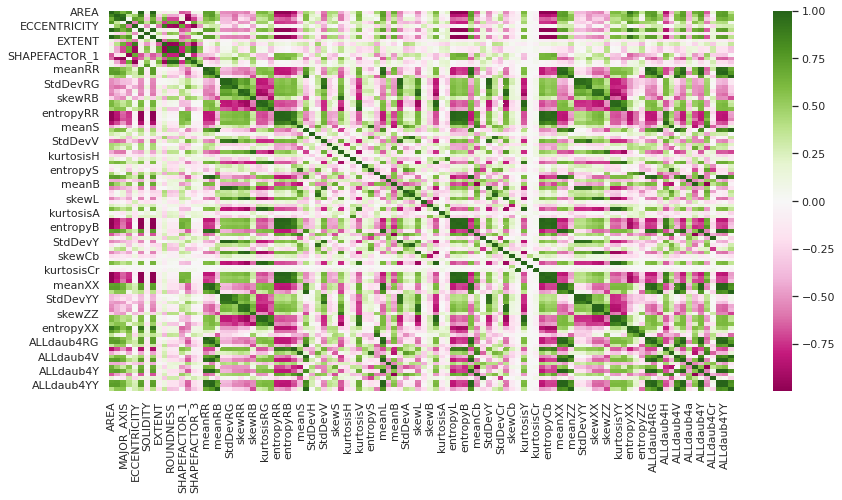

In [119]:
sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(corr ,cmap="PiYG")

In [120]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X_corr = X[selected_columns]

In [121]:
X_corr.head(10)

,AREA,PERIMETER,MINOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_4,meanRR,meanRB,StdDevRR,skewRR,skewRB,kurtosisRR,kurtosisRB,entropyRR,meanH,meanS,StdDevH,StdDevS,skewH,skewS,kurtosisH,kurtosisS,entropyH,entropyV,meanA,meanB,StdDevA,skewA,skewB,kurtosisA,kurtosisB,meanCb,meanCr,StdDevCr,skewCb,skewCr,kurtosisCb
0,4369.0,380.825,75.9197,0.8769,0.9847,0.7543,2.0804,0.8104,0.0169,0.0081,0.9931,214.2114,220.0172,16.9244,-1.7446,-1.7199,8.2867,8.2060,-4643266560,0.6747,0.0291,0.0367,0.0114,-9.4187,1.4181,170.5373,5.7506,3329.2900,1946.8860,128.8113,125.0645,0.6093,0.5868,-1.2458,4.9469,4.3660,130.5382,127.5658,0.4957,1.5701,-0.2656,5.2629
1,276.0,311.324,48.7384,0.9373,0.9749,0.5193,2.8703,0.6791,0.0267,0.0093,0.9781,202.9536,217.7362,13.9493,-1.5044,-2.0740,11.3683,12.9415,-2306397952,0.6313,0.0682,0.0228,0.0118,-3.6991,-1.2647,116.1288,6.8175,1915.1392,1162.9735,128.3711,121.7824,0.8162,0.9800,0.5901,4.7628,6.2254,133.4736,125.4796,0.8666,-0.5274,0.7485,6.0316
2,39.0,302.722,47.2320,0.9386,0.9764,0.5324,2.8974,0.6858,0.0274,0.0094,0.9851,225.5859,235.7908,14.1181,-2.1124,-2.6257,13.2426,15.3940,-2771766272,0.6852,0.0485,0.0275,0.0112,-11.0903,-1.1088,317.8574,5.7680,1768.5812,626.9064,130.0058,122.5137,0.6845,-0.1682,1.3168,2.9820,6.1408,132.6921,127.6729,0.4835,-1.3335,-0.5554,5.7182
3,1882.0,307.221,73.3122,0.7896,0.9839,0.7217,1.6298,0.9112,0.0175,0.0107,0.9948,209.7900,231.3586,18.0981,-1.8603,-1.9173,8.3273,8.3909,-3251100416,0.6628,0.0945,0.0318,0.0228,-15.4409,-1.0864,310.2072,4.8910,2463.0757,972.5988,130.9452,117.4823,1.1263,-0.4502,0.8977,3.1681,4.0258,137.2867,126.2056,0.7873,-1.1734,0.4413,4.4266
4,787.0,336.683,48.3080,0.9492,0.9802,0.4704,3.1790,0.6373,0.0267,0.0084,0.9867,209.6351,224.5130,12.5231,-1.8473,-2.3382,12.5988,13.7780,-2713287424,0.6550,0.0677,0.0219,0.0109,-9.1974,-0.8948,282.0959,6.3563,2082.1985,1094.4230,129.4397,120.8158,0.8436,0.9330,0.8091,3.7533,5.8201,134.2581,126.3788,0.6285,-0.6600,1.1845,5.6027
5,10782.0,553.662,102.4886,0.8998,0.9783,0.7960,2.2920,0.7679,0.0125,0.0055,0.9907,240.2399,240.1346,9.2977,-3.5759,-3.8878,32.6349,36.7006,-11875716096,0.2534,0.0121,0.1550,0.0075,-0.4121,-0.3620,2.0525,1.9965,3358.6565,1657.6816,127.1442,128.6938,0.6742,-0.2330,0.5674,2.3787,2.8686,127.3111,127.0499,0.8095,-0.4502,-0.0911,2.4430
6,3192.0,460.545,46.2654,0.9790,0.9759,0.7938,4.9099,0.4831,0.0279,0.0057,0.9879,220.1490,237.9287,16.8574,-1.5956,-2.9697,8.4061,14.4425,-4295268864,0.6548,0.0756,0.0206,0.0272,0.0785,0.0412,10.7121,2.3102,2953.2244,890.5983,129.8027,119.6360,1.2274,0.3507,-0.0973,2.5531,2.3697,135.3906,126.1100,0.9068,-0.0726,0.0345,2.2863
7,2876.0,446.553,47.1579,0.9759,0.9744,0.7979,4.5860,0.4939,0.0276,0.0060,0.9785,215.1526,239.0526,17.4543,0.0079,-2.8928,4.0255,20.0921,-3930530560,0.6371,0.1006,0.0359,0.0420,-10.1171,-0.5164,168.5835,2.0676,2852.9829,836.2031,129.9053,117.3126,1.5856,-0.1982,0.4770,1.8740,2.0618,137.4816,124.8719,1.0797,-0.5140,0.8910,2.1626
8,1092.0,298.844,65.7623,0.8294,0.9807,0.6541,1.7899,0.8519,0.0194,0.0109,0.9958,193.2204,208.2878,17.0703,-1.7208,-1.5240,7.9973,7.0832,-2403129600,0.6865,0.0830,0.0160,0.0276,-14.4255,-0.2109,566.0495,2.5548,2143.5061,1548.3335,131.4090,119.5742,1.4920,-0.4217,0.3027,2.3976,2.4727,135.3599,127.7142,0.4518,-0.4296,-0.9484,2.3143
9,1373.0,297.016,74.1736,0.7415,0.9721,0.7153,1.4904,0.9024,0.0175,0.0117,0.9837,199.1752,226.9320,14.2150,-2.3742,-2.8399,13.4881,15.0396,-2678238464,0.6643,0.1234,0.0126,0.0226,-22.7435,-1.2993,1207.9714,4.4990,2285.0918,1098.9751,131.8016,114.3923,0.9590,-0.7564,1.4250,5.4038,4.7518,140.0178,125.6243,0.8084,-1.2906,0.7225,4.3394


In [122]:
X_corr.shape

(75000, 42)

In [123]:
# iterating the columns
for col_corr in X_corr.columns:
    print(col_corr)

AREA
PERIMETER
MINOR_AXIS
ECCENTRICITY
SOLIDITY
EXTENT
ASPECT_RATIO
ROUNDNESS
SHAPEFACTOR_1
SHAPEFACTOR_2
SHAPEFACTOR_4
meanRR
meanRB
StdDevRR
skewRR
skewRB
kurtosisRR
kurtosisRB
entropyRR
meanH
meanS
StdDevH
StdDevS
skewH
skewS
kurtosisH
kurtosisS
entropyH
entropyV
meanA
meanB
StdDevA
skewA
skewB
kurtosisA
kurtosisB
meanCb
meanCr
StdDevCr
skewCb
skewCr
kurtosisCb


## 5. Create Predictive Model

### 5.1 Elbow Method

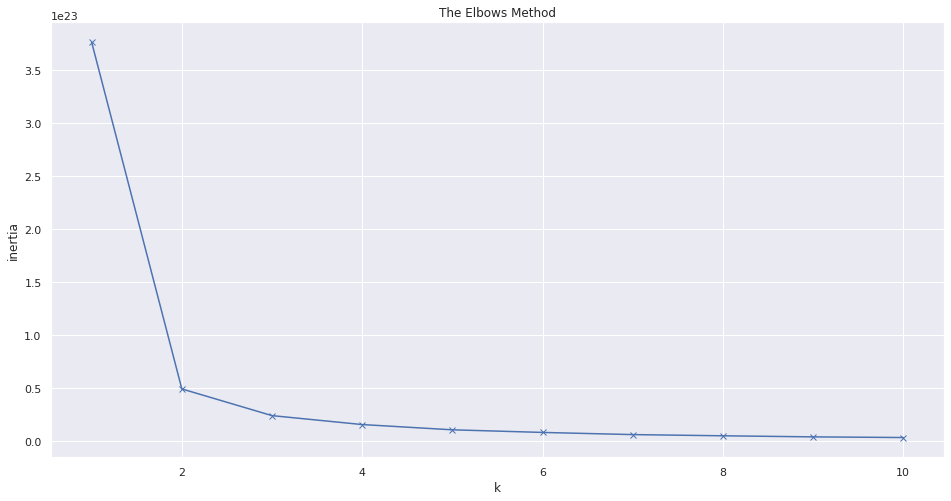

In [124]:
inertias = []
# Set the K group to be in the range 1 to 10.
K = range(1, 11)

for k in K:
  # Building and fitting the model
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X_corr)
  inertias.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertias,  'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbows Method')
plt.show()

### 5.2 KMeans

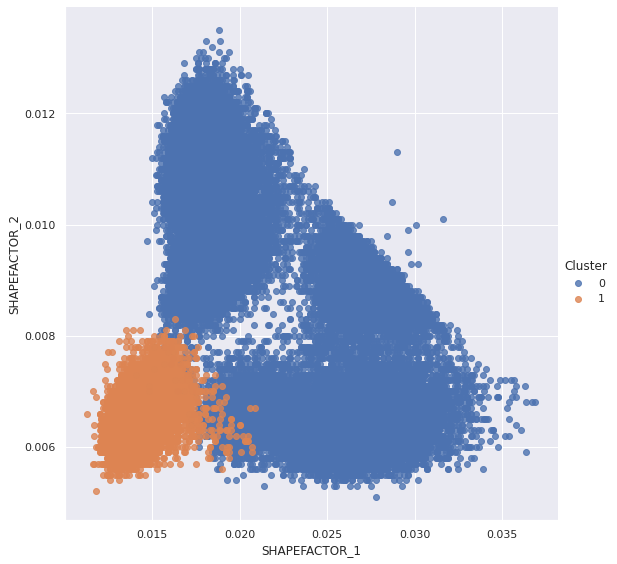

In [125]:
# KMeans model cluster = 2
kmeans = KMeans(n_clusters=2, random_state=100)
all_shape = X_corr.columns[X_corr.columns != 'Cluster']
shape = ['SHAPEFACTOR_1', 'SHAPEFACTOR_2']
X_corr['Cluster'] = kmeans.fit_predict(X_corr[all_shape]).astype(int)
sns.lmplot(shape[0], shape[1], data=X_corr, hue='Cluster', fit_reg=False, height=8)
plt.show()

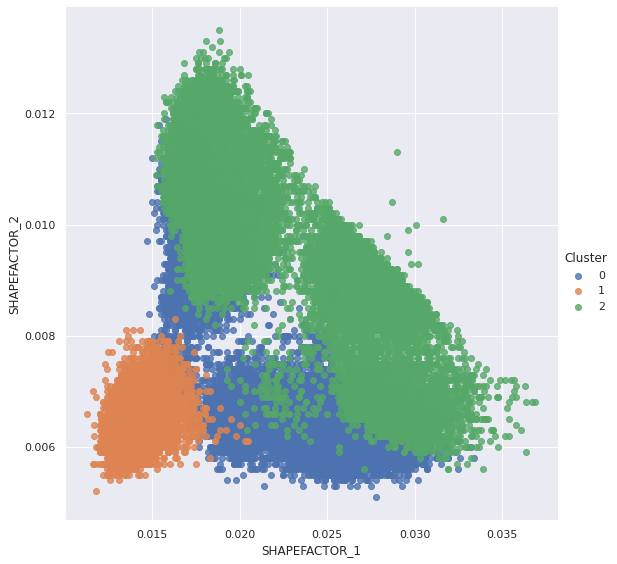

In [126]:
# KMeans model cluster = 3
kmeans = KMeans(n_clusters=3, random_state=100)
all_shape = X_corr.columns[X_corr.columns != 'Cluster']
shape = ['SHAPEFACTOR_1', 'SHAPEFACTOR_2']
X_corr['Cluster'] = kmeans.fit_predict(X_corr[all_shape]).astype(int)
sns.lmplot(shape[0], shape[1], data=X_corr, hue='Cluster', fit_reg=False, height=8)
plt.show()

In [127]:
# Show the centroids of each data
centroids = X_corr.groupby('Cluster').mean()
centroids

,AREA,PERIMETER,MINOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_4,meanRR,meanRB,StdDevRR,skewRR,skewRB,kurtosisRR,kurtosisRB,entropyRR,meanH,meanS,StdDevH,StdDevS,skewH,skewS,kurtosisH,kurtosisS,entropyH,entropyV,meanA,meanB,StdDevA,skewA,skewB,kurtosisA,kurtosisB,meanCb,meanCr,StdDevCr,skewCb,skewCr,kurtosisCb
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3102.581255,396.796427,61.303026,0.914927,0.973558,0.598775,3.069253,0.667399,0.021896,0.007648,0.983775,217.325929,231.967775,17.290236,-1.315013,-2.440300,7.746620,13.211963,-4.138917e+09,0.613204,0.066191,0.068666,0.023289,-5.566026,0.094756,114.739982,3.632918,2755.018315,1125.561032,128.372327,122.015598,1.109547,0.426517,-0.008284,3.981897,3.492313,133.379816,125.597495,0.830098,0.051961,2.823234,3.638332
1,8187.147757,477.869605,92.121014,0.883662,0.977452,0.663156,2.151323,0.775896,0.014068,0.006549,0.986752,236.382795,232.658520,10.796138,-3.029721,-2.816396,23.289485,22.336920,-8.654493e+09,0.201327,0.021854,0.100008,0.013522,1.806017,0.909623,32.651977,6.483404,1835.036165,1651.050313,127.287408,130.024187,0.628136,-0.261611,1.303796,4.502999,6.663955,126.163503,127.981994,0.784860,-1.219576,0.549468,8.412341
2,1168.935888,320.852902,60.178191,0.864919,0.977024,0.646833,2.425872,0.763899,0.022460,0.009793,0.986306,207.068106,222.758661,15.804291,-1.595844,-2.101624,10.308081,12.040534,-2.824214e+09,0.646621,0.072906,0.045364,0.018365,-7.053407,-0.422296,187.763391,4.535290,2172.268036,1164.586525,129.691223,120.554863,0.943695,0.036659,0.609479,4.418621,4.849316,134.517565,126.342907,0.683018,-0.551560,1.407249,4.859602


In [128]:
# Displays the proportion of values in each cluster
X_corr['Cluster'].value_counts()

2    34081
0    26226
1    14693
Name: Cluster, dtype: int64

In [129]:
# Show the first 10 rows of df_X_pca
X_corr.head(10)

,AREA,PERIMETER,MINOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_4,meanRR,meanRB,StdDevRR,skewRR,skewRB,kurtosisRR,kurtosisRB,entropyRR,meanH,meanS,StdDevH,StdDevS,skewH,skewS,kurtosisH,kurtosisS,entropyH,entropyV,meanA,meanB,StdDevA,skewA,skewB,kurtosisA,kurtosisB,meanCb,meanCr,StdDevCr,skewCb,skewCr,kurtosisCb,Cluster
0,4369.0,380.825,75.9197,0.8769,0.9847,0.7543,2.0804,0.8104,0.0169,0.0081,0.9931,214.2114,220.0172,16.9244,-1.7446,-1.7199,8.2867,8.2060,-4643266560,0.6747,0.0291,0.0367,0.0114,-9.4187,1.4181,170.5373,5.7506,3329.2900,1946.8860,128.8113,125.0645,0.6093,0.5868,-1.2458,4.9469,4.3660,130.5382,127.5658,0.4957,1.5701,-0.2656,5.2629,0
1,276.0,311.324,48.7384,0.9373,0.9749,0.5193,2.8703,0.6791,0.0267,0.0093,0.9781,202.9536,217.7362,13.9493,-1.5044,-2.0740,11.3683,12.9415,-2306397952,0.6313,0.0682,0.0228,0.0118,-3.6991,-1.2647,116.1288,6.8175,1915.1392,1162.9735,128.3711,121.7824,0.8162,0.9800,0.5901,4.7628,6.2254,133.4736,125.4796,0.8666,-0.5274,0.7485,6.0316,2
2,39.0,302.722,47.2320,0.9386,0.9764,0.5324,2.8974,0.6858,0.0274,0.0094,0.9851,225.5859,235.7908,14.1181,-2.1124,-2.6257,13.2426,15.3940,-2771766272,0.6852,0.0485,0.0275,0.0112,-11.0903,-1.1088,317.8574,5.7680,1768.5812,626.9064,130.0058,122.5137,0.6845,-0.1682,1.3168,2.9820,6.1408,132.6921,127.6729,0.4835,-1.3335,-0.5554,5.7182,2
3,1882.0,307.221,73.3122,0.7896,0.9839,0.7217,1.6298,0.9112,0.0175,0.0107,0.9948,209.7900,231.3586,18.0981,-1.8603,-1.9173,8.3273,8.3909,-3251100416,0.6628,0.0945,0.0318,0.0228,-15.4409,-1.0864,310.2072,4.8910,2463.0757,972.5988,130.9452,117.4823,1.1263,-0.4502,0.8977,3.1681,4.0258,137.2867,126.2056,0.7873,-1.1734,0.4413,4.4266,2
4,787.0,336.683,48.3080,0.9492,0.9802,0.4704,3.1790,0.6373,0.0267,0.0084,0.9867,209.6351,224.5130,12.5231,-1.8473,-2.3382,12.5988,13.7780,-2713287424,0.6550,0.0677,0.0219,0.0109,-9.1974,-0.8948,282.0959,6.3563,2082.1985,1094.4230,129.4397,120.8158,0.8436,0.9330,0.8091,3.7533,5.8201,134.2581,126.3788,0.6285,-0.6600,1.1845,5.6027,2
5,10782.0,553.662,102.4886,0.8998,0.9783,0.7960,2.2920,0.7679,0.0125,0.0055,0.9907,240.2399,240.1346,9.2977,-3.5759,-3.8878,32.6349,36.7006,-11875716096,0.2534,0.0121,0.1550,0.0075,-0.4121,-0.3620,2.0525,1.9965,3358.6565,1657.6816,127.1442,128.6938,0.6742,-0.2330,0.5674,2.3787,2.8686,127.3111,127.0499,0.8095,-0.4502,-0.0911,2.4430,1
6,3192.0,460.545,46.2654,0.9790,0.9759,0.7938,4.9099,0.4831,0.0279,0.0057,0.9879,220.1490,237.9287,16.8574,-1.5956,-2.9697,8.4061,14.4425,-4295268864,0.6548,0.0756,0.0206,0.0272,0.0785,0.0412,10.7121,2.3102,2953.2244,890.5983,129.8027,119.6360,1.2274,0.3507,-0.0973,2.5531,2.3697,135.3906,126.1100,0.9068,-0.0726,0.0345,2.2863,0
7,2876.0,446.553,47.1579,0.9759,0.9744,0.7979,4.5860,0.4939,0.0276,0.0060,0.9785,215.1526,239.0526,17.4543,0.0079,-2.8928,4.0255,20.0921,-3930530560,0.6371,0.1006,0.0359,0.0420,-10.1171,-0.5164,168.5835,2.0676,2852.9829,836.2031,129.9053,117.3126,1.5856,-0.1982,0.4770,1.8740,2.0618,137.4816,124.8719,1.0797,-0.5140,0.8910,2.1626,0
8,1092.0,298.844,65.7623,0.8294,0.9807,0.6541,1.7899,0.8519,0.0194,0.0109,0.9958,193.2204,208.2878,17.0703,-1.7208,-1.5240,7.9973,7.0832,-2403129600,0.6865,0.0830,0.0160,0.0276,-14.4255,-0.2109,566.0495,2.5548,2143.5061,1548.3335,131.4090,119.5742,1.4920,-0.4217,0.3027,2.3976,2.4727,135.3599,127.7142,0.4518,-0.4296,-0.9484,2.3143,2
9,1373.0,297.016,74.1736,0.7415,0.9721,0.7153,1.4904,0.9024,0.0175,0.0117,0.9837,199.1752,226.9320,14.2150,-2.3742,-2.8399,13.4881,15.0396,-2678238464,0.6643,0.1234,0.0126,0.0226,-22.7435,-1.2993,1207.9714,4.4990,2285.0918,1098.9751,131.8016,114.3923,0.9590,-0.7564,1.4250,5.4038,4.7518,140.0178,125.6243,0.8084,-1.2906,0.7225,4.3394,2


### 5.3 Add Label in New Dataset

In [130]:
# Create a new dataset with labels
df_new = X_corr.copy()
df_new['Cluster'] = X_corr['Cluster']
df_new.head(10)

,AREA,PERIMETER,MINOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_4,meanRR,meanRB,StdDevRR,skewRR,skewRB,kurtosisRR,kurtosisRB,entropyRR,meanH,meanS,StdDevH,StdDevS,skewH,skewS,kurtosisH,kurtosisS,entropyH,entropyV,meanA,meanB,StdDevA,skewA,skewB,kurtosisA,kurtosisB,meanCb,meanCr,StdDevCr,skewCb,skewCr,kurtosisCb,Cluster
0,4369.0,380.825,75.9197,0.8769,0.9847,0.7543,2.0804,0.8104,0.0169,0.0081,0.9931,214.2114,220.0172,16.9244,-1.7446,-1.7199,8.2867,8.2060,-4643266560,0.6747,0.0291,0.0367,0.0114,-9.4187,1.4181,170.5373,5.7506,3329.2900,1946.8860,128.8113,125.0645,0.6093,0.5868,-1.2458,4.9469,4.3660,130.5382,127.5658,0.4957,1.5701,-0.2656,5.2629,0
1,276.0,311.324,48.7384,0.9373,0.9749,0.5193,2.8703,0.6791,0.0267,0.0093,0.9781,202.9536,217.7362,13.9493,-1.5044,-2.0740,11.3683,12.9415,-2306397952,0.6313,0.0682,0.0228,0.0118,-3.6991,-1.2647,116.1288,6.8175,1915.1392,1162.9735,128.3711,121.7824,0.8162,0.9800,0.5901,4.7628,6.2254,133.4736,125.4796,0.8666,-0.5274,0.7485,6.0316,2
2,39.0,302.722,47.2320,0.9386,0.9764,0.5324,2.8974,0.6858,0.0274,0.0094,0.9851,225.5859,235.7908,14.1181,-2.1124,-2.6257,13.2426,15.3940,-2771766272,0.6852,0.0485,0.0275,0.0112,-11.0903,-1.1088,317.8574,5.7680,1768.5812,626.9064,130.0058,122.5137,0.6845,-0.1682,1.3168,2.9820,6.1408,132.6921,127.6729,0.4835,-1.3335,-0.5554,5.7182,2
3,1882.0,307.221,73.3122,0.7896,0.9839,0.7217,1.6298,0.9112,0.0175,0.0107,0.9948,209.7900,231.3586,18.0981,-1.8603,-1.9173,8.3273,8.3909,-3251100416,0.6628,0.0945,0.0318,0.0228,-15.4409,-1.0864,310.2072,4.8910,2463.0757,972.5988,130.9452,117.4823,1.1263,-0.4502,0.8977,3.1681,4.0258,137.2867,126.2056,0.7873,-1.1734,0.4413,4.4266,2
4,787.0,336.683,48.3080,0.9492,0.9802,0.4704,3.1790,0.6373,0.0267,0.0084,0.9867,209.6351,224.5130,12.5231,-1.8473,-2.3382,12.5988,13.7780,-2713287424,0.6550,0.0677,0.0219,0.0109,-9.1974,-0.8948,282.0959,6.3563,2082.1985,1094.4230,129.4397,120.8158,0.8436,0.9330,0.8091,3.7533,5.8201,134.2581,126.3788,0.6285,-0.6600,1.1845,5.6027,2
5,10782.0,553.662,102.4886,0.8998,0.9783,0.7960,2.2920,0.7679,0.0125,0.0055,0.9907,240.2399,240.1346,9.2977,-3.5759,-3.8878,32.6349,36.7006,-11875716096,0.2534,0.0121,0.1550,0.0075,-0.4121,-0.3620,2.0525,1.9965,3358.6565,1657.6816,127.1442,128.6938,0.6742,-0.2330,0.5674,2.3787,2.8686,127.3111,127.0499,0.8095,-0.4502,-0.0911,2.4430,1
6,3192.0,460.545,46.2654,0.9790,0.9759,0.7938,4.9099,0.4831,0.0279,0.0057,0.9879,220.1490,237.9287,16.8574,-1.5956,-2.9697,8.4061,14.4425,-4295268864,0.6548,0.0756,0.0206,0.0272,0.0785,0.0412,10.7121,2.3102,2953.2244,890.5983,129.8027,119.6360,1.2274,0.3507,-0.0973,2.5531,2.3697,135.3906,126.1100,0.9068,-0.0726,0.0345,2.2863,0
7,2876.0,446.553,47.1579,0.9759,0.9744,0.7979,4.5860,0.4939,0.0276,0.0060,0.9785,215.1526,239.0526,17.4543,0.0079,-2.8928,4.0255,20.0921,-3930530560,0.6371,0.1006,0.0359,0.0420,-10.1171,-0.5164,168.5835,2.0676,2852.9829,836.2031,129.9053,117.3126,1.5856,-0.1982,0.4770,1.8740,2.0618,137.4816,124.8719,1.0797,-0.5140,0.8910,2.1626,0
8,1092.0,298.844,65.7623,0.8294,0.9807,0.6541,1.7899,0.8519,0.0194,0.0109,0.9958,193.2204,208.2878,17.0703,-1.7208,-1.5240,7.9973,7.0832,-2403129600,0.6865,0.0830,0.0160,0.0276,-14.4255,-0.2109,566.0495,2.5548,2143.5061,1548.3335,131.4090,119.5742,1.4920,-0.4217,0.3027,2.3976,2.4727,135.3599,127.7142,0.4518,-0.4296,-0.9484,2.3143,2
9,1373.0,297.016,74.1736,0.7415,0.9721,0.7153,1.4904,0.9024,0.0175,0.0117,0.9837,199.1752,226.9320,14.2150,-2.3742,-2.8399,13.4881,15.0396,-2678238464,0.6643,0.1234,0.0126,0.0226,-22.7435,-1.2993,1207.9714,4.4990,2285.0918,1098.9751,131.8016,114.3923,0.9590,-0.7564,1.4250,5.4038,4.7518,140.0178,125.6243,0.8084,-1.2906,0.7225,4.3394,2


In [131]:
import os
os.makedirs('folder label', exist_ok=True)
df_new['Cluster'].to_csv('folder label/Clustering_61070139-62070247-62070275(2).csv', index=False)

## 6. Evalutate model

### 6.1 Split Feature and Label Function

In [132]:
# Define function for split feature and label
def split_data_label(df):
  y = df['Cluster']
  X = df.drop('Cluster', axis=1)
  return X, y

### 6.2 Split Feature and Label

In [133]:
# Split data
X, y = split_data_label(df_new)

In [134]:
# Show feature (X)
X.head(10)

,AREA,PERIMETER,MINOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_4,meanRR,meanRB,StdDevRR,skewRR,skewRB,kurtosisRR,kurtosisRB,entropyRR,meanH,meanS,StdDevH,StdDevS,skewH,skewS,kurtosisH,kurtosisS,entropyH,entropyV,meanA,meanB,StdDevA,skewA,skewB,kurtosisA,kurtosisB,meanCb,meanCr,StdDevCr,skewCb,skewCr,kurtosisCb
0,4369.0,380.825,75.9197,0.8769,0.9847,0.7543,2.0804,0.8104,0.0169,0.0081,0.9931,214.2114,220.0172,16.9244,-1.7446,-1.7199,8.2867,8.2060,-4643266560,0.6747,0.0291,0.0367,0.0114,-9.4187,1.4181,170.5373,5.7506,3329.2900,1946.8860,128.8113,125.0645,0.6093,0.5868,-1.2458,4.9469,4.3660,130.5382,127.5658,0.4957,1.5701,-0.2656,5.2629
1,276.0,311.324,48.7384,0.9373,0.9749,0.5193,2.8703,0.6791,0.0267,0.0093,0.9781,202.9536,217.7362,13.9493,-1.5044,-2.0740,11.3683,12.9415,-2306397952,0.6313,0.0682,0.0228,0.0118,-3.6991,-1.2647,116.1288,6.8175,1915.1392,1162.9735,128.3711,121.7824,0.8162,0.9800,0.5901,4.7628,6.2254,133.4736,125.4796,0.8666,-0.5274,0.7485,6.0316
2,39.0,302.722,47.2320,0.9386,0.9764,0.5324,2.8974,0.6858,0.0274,0.0094,0.9851,225.5859,235.7908,14.1181,-2.1124,-2.6257,13.2426,15.3940,-2771766272,0.6852,0.0485,0.0275,0.0112,-11.0903,-1.1088,317.8574,5.7680,1768.5812,626.9064,130.0058,122.5137,0.6845,-0.1682,1.3168,2.9820,6.1408,132.6921,127.6729,0.4835,-1.3335,-0.5554,5.7182
3,1882.0,307.221,73.3122,0.7896,0.9839,0.7217,1.6298,0.9112,0.0175,0.0107,0.9948,209.7900,231.3586,18.0981,-1.8603,-1.9173,8.3273,8.3909,-3251100416,0.6628,0.0945,0.0318,0.0228,-15.4409,-1.0864,310.2072,4.8910,2463.0757,972.5988,130.9452,117.4823,1.1263,-0.4502,0.8977,3.1681,4.0258,137.2867,126.2056,0.7873,-1.1734,0.4413,4.4266
4,787.0,336.683,48.3080,0.9492,0.9802,0.4704,3.1790,0.6373,0.0267,0.0084,0.9867,209.6351,224.5130,12.5231,-1.8473,-2.3382,12.5988,13.7780,-2713287424,0.6550,0.0677,0.0219,0.0109,-9.1974,-0.8948,282.0959,6.3563,2082.1985,1094.4230,129.4397,120.8158,0.8436,0.9330,0.8091,3.7533,5.8201,134.2581,126.3788,0.6285,-0.6600,1.1845,5.6027
5,10782.0,553.662,102.4886,0.8998,0.9783,0.7960,2.2920,0.7679,0.0125,0.0055,0.9907,240.2399,240.1346,9.2977,-3.5759,-3.8878,32.6349,36.7006,-11875716096,0.2534,0.0121,0.1550,0.0075,-0.4121,-0.3620,2.0525,1.9965,3358.6565,1657.6816,127.1442,128.6938,0.6742,-0.2330,0.5674,2.3787,2.8686,127.3111,127.0499,0.8095,-0.4502,-0.0911,2.4430
6,3192.0,460.545,46.2654,0.9790,0.9759,0.7938,4.9099,0.4831,0.0279,0.0057,0.9879,220.1490,237.9287,16.8574,-1.5956,-2.9697,8.4061,14.4425,-4295268864,0.6548,0.0756,0.0206,0.0272,0.0785,0.0412,10.7121,2.3102,2953.2244,890.5983,129.8027,119.6360,1.2274,0.3507,-0.0973,2.5531,2.3697,135.3906,126.1100,0.9068,-0.0726,0.0345,2.2863
7,2876.0,446.553,47.1579,0.9759,0.9744,0.7979,4.5860,0.4939,0.0276,0.0060,0.9785,215.1526,239.0526,17.4543,0.0079,-2.8928,4.0255,20.0921,-3930530560,0.6371,0.1006,0.0359,0.0420,-10.1171,-0.5164,168.5835,2.0676,2852.9829,836.2031,129.9053,117.3126,1.5856,-0.1982,0.4770,1.8740,2.0618,137.4816,124.8719,1.0797,-0.5140,0.8910,2.1626
8,1092.0,298.844,65.7623,0.8294,0.9807,0.6541,1.7899,0.8519,0.0194,0.0109,0.9958,193.2204,208.2878,17.0703,-1.7208,-1.5240,7.9973,7.0832,-2403129600,0.6865,0.0830,0.0160,0.0276,-14.4255,-0.2109,566.0495,2.5548,2143.5061,1548.3335,131.4090,119.5742,1.4920,-0.4217,0.3027,2.3976,2.4727,135.3599,127.7142,0.4518,-0.4296,-0.9484,2.3143
9,1373.0,297.016,74.1736,0.7415,0.9721,0.7153,1.4904,0.9024,0.0175,0.0117,0.9837,199.1752,226.9320,14.2150,-2.3742,-2.8399,13.4881,15.0396,-2678238464,0.6643,0.1234,0.0126,0.0226,-22.7435,-1.2993,1207.9714,4.4990,2285.0918,1098.9751,131.8016,114.3923,0.9590,-0.7564,1.4250,5.4038,4.7518,140.0178,125.6243,0.8084,-1.2906,0.7225,4.3394


In [135]:
# Show label (y)
y.head(10)

0    0
1    2
2    2
3    2
4    2
5    1
6    0
7    0
8    2
9    2
Name: Cluster, dtype: int64

### 6.2 Accuracy metrics

In [136]:
data = datasets.load_digits()
X, y = data.data, data.target

# Use KMeans, Affinity propagation, Spectral and Agglomerative clustering model
models = []
models.append(KMeans(n_clusters=3, random_state=1))
models.append(AffinityPropagation())
models.append(SpectralClustering(n_clusters=3, random_state=1, affinity='nearest_neighbors'))
models.append(AgglomerativeClustering(n_clusters=3))

data = []
# Fit all models
for model in models:
    model.fit(X)

data.append(({'ARI': metrics.adjusted_rand_score(y, model.labels_), 
              'AMI': metrics.adjusted_mutual_info_score(y, model.labels_,average_method='arithmetic'),
              'Homogenity': metrics.homogeneity_score(y, model.labels_),
              'Completeness': metrics.completeness_score(y, model.labels_),
              'V-measure': metrics.v_measure_score(y, model.labels_),
              'Silhouette': metrics.silhouette_score(X, model.labels_)}))
# Create dataframe 
results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity','Completeness', 'V-measure', 'Silhouette'], 
                       index=['K-means', 'Affinity', 'Spectral', 'Agglomerative'])
# Show accuracy metrix
results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.30654,0.542706,0.401064,0.84553,0.544061,0.11189
Affinity,0.30654,0.542706,0.401064,0.84553,0.544061,0.11189
Spectral,0.30654,0.542706,0.401064,0.84553,0.544061,0.11189
Agglomerative,0.30654,0.542706,0.401064,0.84553,0.544061,0.11189
